# 📦 箱线图 (Box Plot) - 分布与异常值检测

## 什么是箱线图？

箱线图通过**五数概括**展示数据分布：最小值、Q1（25%分位数）、中位数、Q3（75%分位数）、最大值。

## 适用场景

| 场景 | 示例 |
|------|------|
| 检测异常值 | 找出极端数据点 |
| 组间比较 | 东道主vs非东道主奖牌分布 |
| 查看数据集中程度 | 箱体越窄，数据越集中 |
| 对比不同类别 | 不同国家的奖牌分布差异 |

## 关键指标解读

```
    ┌───┬───┐
    │   │   │  ← 异常值（超出1.5*IQR）
    └───┴───┘
        │
    ┌───────┐  ← 最大值（非异常）
    │       │
    ├───────┤  ← Q3 (75%)
    │   ─   │  ← 中位数 (50%)
    ├───────┤  ← Q1 (25%)
    │       │
    └───────┘  ← 最小值（非异常）
        │
    ○   ○   ○  ← 异常值
```

- **IQR (四分位距)** = Q3 - Q1
- **异常值界限**：< Q1 - 1.5×IQR 或 > Q3 + 1.5×IQR
- **箱体高度**：反映数据离散程度


/var/folders/15/qkh_qc196d34f_fnmn3c2prr0000gn/T/ipykernel_262/4023084863.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([non_host_medals, host_medals],


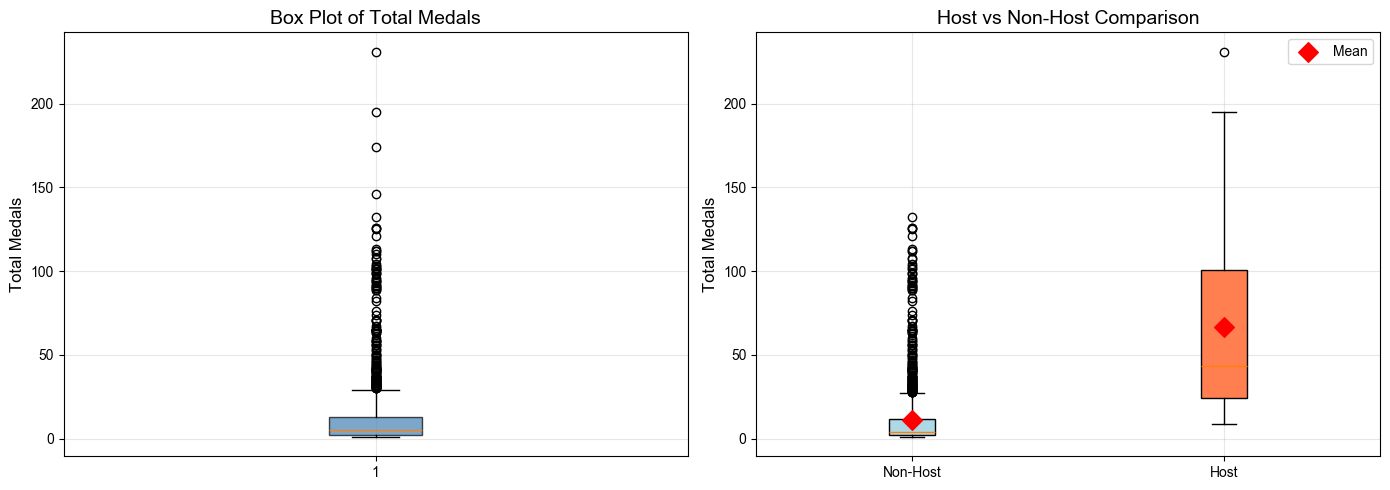

📊 分组统计对比:

非东道主 (n=1405):
  Q1: 2.0, 中位数: 4.0, Q3: 12.0

东道主 (n=30):
  Q1: 24.5, 中位数: 43.5, Q3: 100.8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('../preprocessing/2025C示例/processed_medal_data.csv')

# 创建分组比较的箱线图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 单变量箱线图
axes[0].boxplot(df['Total'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7))
axes[0].set_ylabel('Total Medals', fontsize=12)
axes[0].set_title('Box Plot of Total Medals', fontsize=14)
axes[0].grid(True, alpha=0.3)

# 2. 分组比较箱线图（东道主 vs 非东道主）
host_medals = df[df['is_host'] == 1]['Total']
non_host_medals = df[df['is_host'] == 0]['Total']

bp = axes[1].boxplot([non_host_medals, host_medals], 
                      labels=['Non-Host', 'Host'],
                      patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('coral')

# 添加均值点
axes[1].scatter([1, 2], [non_host_medals.mean(), host_medals.mean()], 
                color='red', s=100, zorder=5, marker='D', label='Mean')
axes[1].set_ylabel('Total Medals', fontsize=12)
axes[1].set_title('Host vs Non-Host Comparison', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 输出统计信息
print("📊 分组统计对比:")
print(f"\n非东道主 (n={len(non_host_medals)}):")
print(f"  Q1: {non_host_medals.quantile(0.25):.1f}, 中位数: {non_host_medals.median():.1f}, Q3: {non_host_medals.quantile(0.75):.1f}")
print(f"\n东道主 (n={len(host_medals)}):")
print(f"  Q1: {host_medals.quantile(0.25):.1f}, 中位数: {host_medals.median():.1f}, Q3: {host_medals.quantile(0.75):.1f}")


## 🎯 2025美赛C题解读：东道主效应验证

### 图形分析结论

从箱线图对比我们可以直观看出**东道主效应的存在**：

**1. 统计数据对比**

| 指标 | 非东道主 | 东道主 | 差异 |
|------|----------|--------|------|
| Q1 | 2.0 | 24.5 | **+1125%** |
| 中位数 | 4.0 | 43.5 | **+988%** |
| Q3 | 12.0 | 100.8 | **+740%** |

**2. 关键发现**

- 🏠 **东道主中位数(43.5)是非东道主(4.0)的10倍以上！**
- 东道主的Q1(24.5)已经超过非东道主的Q3(12)
- 说明**东道主效应是显著且强烈的**

**3. 异常值分析**

- 左图显示非东道主数据有大量异常值（超出1.5*IQR）
- 这些"异常值"其实是美国、中国等**常态化体育强国**
- 右图东道主数据相对更集中，因为东道国通常本身就是体育强国

### 对建模的启示

1. **`is_host`是一个极其重要的特征**，必须纳入模型
2. 可以考虑构建**交互特征**：`is_host × total_lag1`
3. 2028预测时，必须考虑**美国作为东道主**的加成效应

### 答题建议
> "通过箱线图分析发现，东道国的奖牌中位数(43.5枚)是非东道国(4枚)的10倍以上，验证了显著的东道主效应。这一发现支持我们将is_host作为关键预测特征，并在预测2028洛杉矶奥运会时考虑美国的东道主优势。"
